In [84]:
#year of data= 2016







In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import r2_score


from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
data=pd.read_csv('2016_data.csv')
data.head(5)

,Country,Number of prostitutesSource: UNAIDS 2016Sex Workers: Size Estimates[4],Number of prostitutesOther sources and year,Population[5],"Prevalence(prostitutes per10,000 population)"
0,Afghanistan,"13,000",NaN,"34,656,032",4
1,Albania,NaN,"5,000 - 30,000 (2006)[6]","2,926,348",17 - 103
2,Algeria,NaN,No data,"40,606,052",-
3,Angola,"33,000",NaN,"28,813,463",12
4,Antigua and Barbuda,755,NaN,"100,963",75


In [87]:
#removing columns which wont be that vital

data=data.drop('Number of prostitutesOther sources and year' ,axis=1)

In [88]:
#new data

data.head()

,Country,Number of prostitutesSource: UNAIDS 2016Sex Workers: Size Estimates[4],Population[5],"Prevalence(prostitutes per10,000 population)"
0,Afghanistan,"13,000","34,656,032",4
1,Albania,NaN,"2,926,348",17 - 103
2,Algeria,NaN,"40,606,052",-
3,Angola,"33,000","28,813,463",12
4,Antigua and Barbuda,755,"100,963",75


In [89]:
#deleting entries without full data

data=data.dropna()

In [90]:
#getting to know about data

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 175
Data columns (total 4 columns):
Country                                                                   118 non-null object
Number of prostitutesSource: UNAIDS 2016Sex Workers: Size Estimates[4]    118 non-null object
Population[5]                                                             118 non-null object
Prevalence(prostitutes per10,000 population)                              118 non-null object
dtypes: object(4)
memory usage: 4.6+ KB


In [91]:
data=data.rename(columns={'Number of prostitutesSource: UNAIDS 2016Sex Workers: Size Estimates[4]':'num',
                          'Population[5]':'pop','Prevalence(prostitutes per10,000 population)':'prev'})

In [92]:
#the new data after changing the names of columns

data.head()

,Country,num,pop,prev
0,Afghanistan,"13,000","34,656,032",4
3,Angola,"33,000","28,813,463",12
4,Antigua and Barbuda,755,"100,963",75
5,Argentina,"75,000","43,847,430",18
6,Armenia,"5,600","2,924,816",17


In [93]:
#converting from comma separated numbers to numbers without commas

for i in range(0,118):
    data['num'].iloc[i]=float(data['num'].iloc[i].replace(',',''))
    data['pop'].iloc[i]=float(data['pop'].iloc[i].replace(',',''))

In [94]:
#converting to numeric

data["num"] = data["num"].apply(pd.to_numeric, errors='coerce').astype('float64')
data["pop"] = data["pop"].apply(pd.to_numeric, errors='coerce').astype('float64')
data["prev"] = data["prev"].apply(pd.to_numeric, errors='coerce').astype('float64')

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 175
Data columns (total 4 columns):
Country    118 non-null object
num        118 non-null float64
pop        118 non-null float64
prev       118 non-null float64
dtypes: float64(3), object(1)
memory usage: 4.6+ KB


In [96]:
data.head()

,Country,num,pop,prev
0,Afghanistan,13000.0,34656032.0,4.0
3,Angola,33000.0,28813463.0,12.0
4,Antigua and Barbuda,755.0,100963.0,75.0
5,Argentina,75000.0,43847430.0,18.0
6,Armenia,5600.0,2924816.0,17.0


In [97]:
data.corr()

,num,pop,prev
num,1.000000,0.287123,0.684805
pop,0.287123,1.000000,-0.050755
prev,0.684805,-0.050755,1.000000


In [98]:
#data visualization

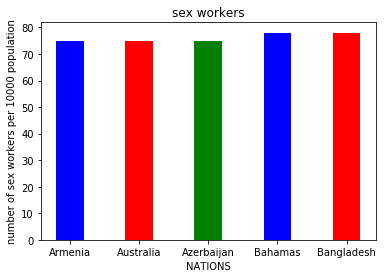

In [99]:
#bar chart
for i in range(0,5):
    
    left = [2,4 ,6,8, 10]

    height = [data['prev'].iloc[i],data['prev'].iloc[i+1],data['prev'].iloc[i+2],data['prev'].iloc[i+3],data['prev'].iloc[i+4]]
    
    tick_label =[data['Country'].iloc[i],data['Country'].iloc[i+1],data['Country'].iloc[i+2],data['Country'].iloc[i+3],data['Country'].iloc[i+4]] 
    
    plt.xlabel('NATIONS') 
 
    plt.ylabel('number of sex workers per 10000 population') 
 
    plt.title('sex workers') 

    plt.bar(left, height, tick_label = tick_label, 
        width = 0.8, color = ['b','r','g']) 

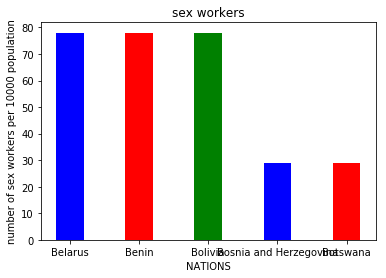

In [100]:
#bar chart
for i in range(5,10):
    
    left = [2,4 ,6,8, 10]

    height = [data['prev'].iloc[i],data['prev'].iloc[i+1],data['prev'].iloc[i+2],data['prev'].iloc[i+3],data['prev'].iloc[i+4]]
    
    tick_label =[data['Country'].iloc[i],data['Country'].iloc[i+1],data['Country'].iloc[i+2],data['Country'].iloc[i+3],data['Country'].iloc[i+4]] 
    
    plt.xlabel('NATIONS') 
 
    plt.ylabel('number of sex workers per 10000 population') 
 
    plt.title('sex workers') 

    plt.bar(left, height, tick_label = tick_label, 
        width = 0.8, color = ['b','r','g']) 

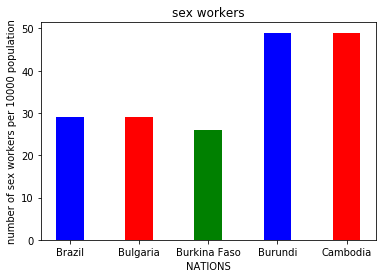

In [101]:
#bar chart
for i in range(10,15):
    
    left = [2,4 ,6,8, 10]

    height = [data['prev'].iloc[i],data['prev'].iloc[i+1],data['prev'].iloc[i+2],data['prev'].iloc[i+3],data['prev'].iloc[i+4]]
    
    tick_label =[data['Country'].iloc[i],data['Country'].iloc[i+1],data['Country'].iloc[i+2],data['Country'].iloc[i+3],data['Country'].iloc[i+4]] 
    
    plt.xlabel('NATIONS') 
    plt.title('sex workers')
 
    plt.ylabel('number of sex workers per 10000 population') 
  

    plt.bar(left, height, tick_label = tick_label, 
        width = 0.8, color = ['b','r','g']) 

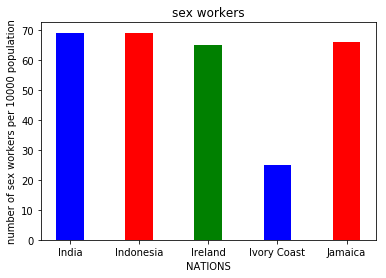

In [102]:
#bar chart
for i in range(45,50):
    
    left = [2,4 ,6,8, 10]

    height = [data['prev'].iloc[i],data['prev'].iloc[i+1],data['prev'].iloc[i+2],data['prev'].iloc[i+3],data['prev'].iloc[i+4]]
    
    tick_label =[data['Country'].iloc[i],data['Country'].iloc[i+1],data['Country'].iloc[i+2],data['Country'].iloc[i+3],data['Country'].iloc[i+4]] 
    
    plt.xlabel('NATIONS') 
 
    plt.ylabel('number of sex workers per 10000 population') 
 
    plt.title('sex workers') 

    plt.bar(left, height, tick_label = tick_label, 
        width = 0.8, color = ['b','r','g']) 

Text(0, 0.5, 'number of sex workers per 10000 population')

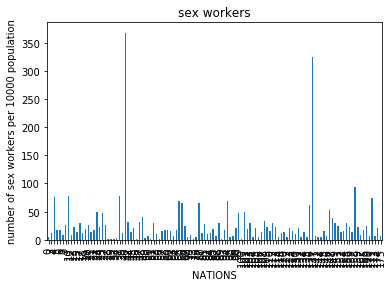

In [103]:
data['prev'].plot(kind='bar')
plt.xlabel('NATIONS')
plt.title('sex workers')
plt.ylabel('number of sex workers per 10000 population') 
  

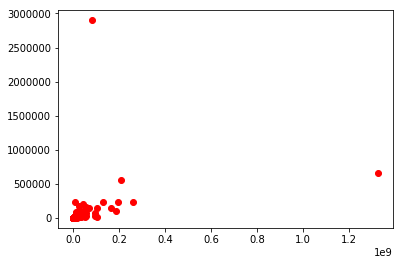

In [104]:
#scatter plot

plt.scatter(data['pop'],data['num'],color='red')

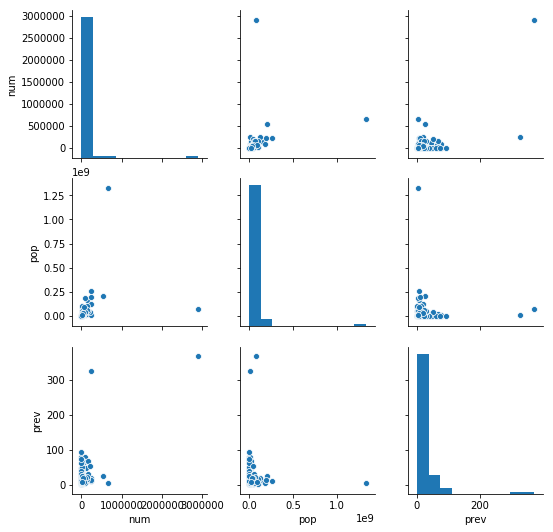

In [105]:
#seaborn pairplot

sns.pairplot(data)

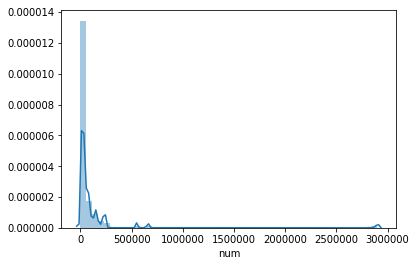

In [106]:
#seaborn distplot

sns.distplot(data['num'])

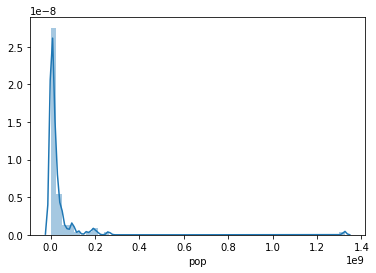

In [107]:
#seaborn distplot

sns.distplot(data['pop'])

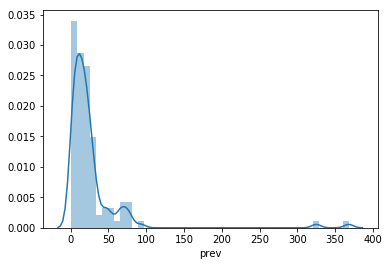

In [108]:
#seaborn distplot

sns.distplot(data['prev'])